In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statistics

In [3]:
#mean,median,mode
df=sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
np.mean(df['total_bill'])

np.float64(19.78594262295082)

In [6]:
np.median(df['total_bill'])

np.float64(17.795)

In [7]:
statistics.mode(df['total_bill'])

13.42

<Axes: ylabel='total_bill'>

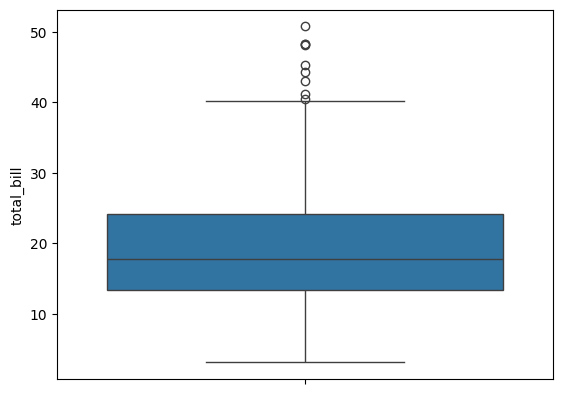

In [8]:
sns.boxplot(df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

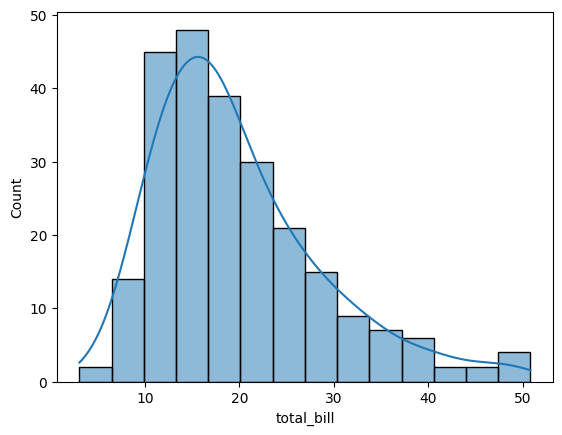

In [11]:
sns.histplot(df['total_bill'],kde=True)

In [13]:
df1=sns.load_dataset('iris')

In [14]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_width', ylabel='Count'>

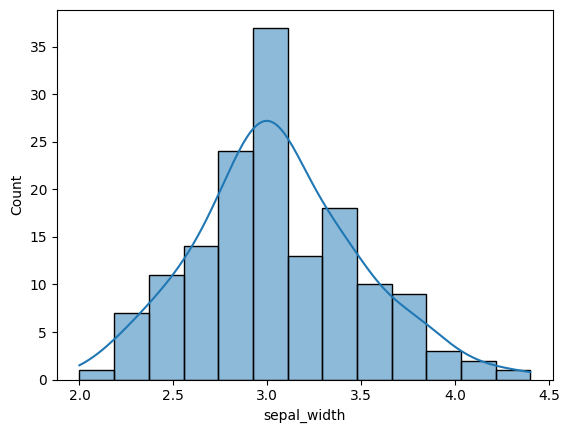

In [17]:
sns.histplot(df1['sepal_width'],kde=True)

<Axes: xlabel='count', ylabel='species'>

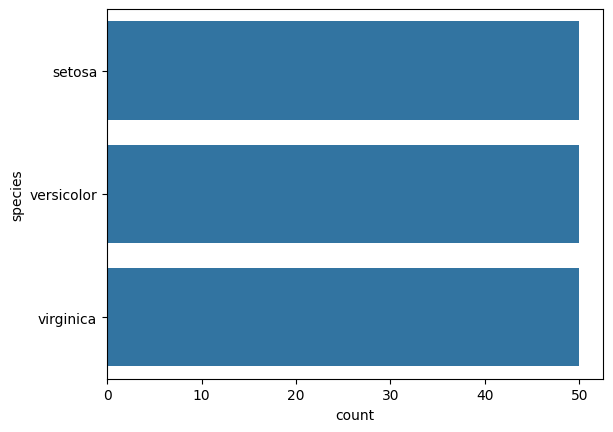

In [18]:
sns.countplot(df1['species'])

In [19]:
np.percentile(df1['sepal_length'],[25,75])

array([5.1, 6.4])

In [1]:
#outliers
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

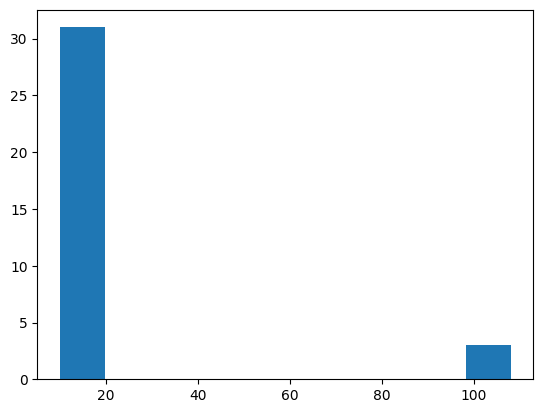

In [6]:
plt.hist(dataset)

In [10]:
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)

    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [11]:
detect_outliers(dataset)

[102, 107, 108]

IQR  
1. Sort the data  
2. Calculate Q1 and Q3  
3. IQR=Q3-Q1  
4. Find the lower fence (Q1-1.5(IQR))  
5. Find the upper fence (Q3-1.5(IQR))  

In [12]:
dataset=sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [13]:
q1,q3=np.percentile(dataset,[25,75])
print(q1,q3)

12.0 15.0


In [14]:
iqr=q3-q1
print(iqr)

3.0


In [15]:
#finding the lower fence and the higher fence
lower_fence=q1-(1.5*iqr)
higher_fence=q3+(1.5*iqr)
print(lower_fence,higher_fence)

7.5 19.5


<Axes: >

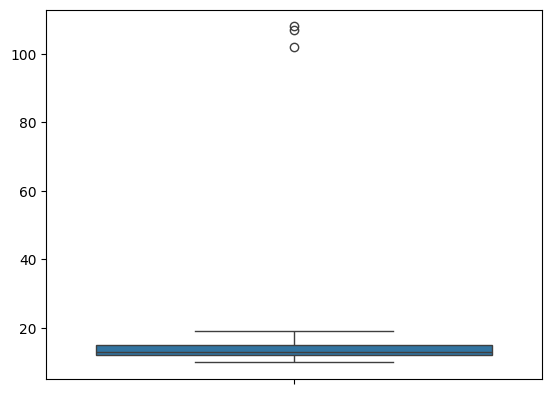

In [16]:
#using seaborn
sns.boxplot(dataset)